In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [11]:
df = pd.read_json('deviation.json')

In [12]:
df.head(3)

,name,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
0,Schlafzimmer,4,4,3.956313,8.562939,0.274574,3.987864,8.562939,0.274574,3.924762,8.501885,0.331494
1,Küche,4,4,23.019122,52.605437,0.724299,1.253103,1.897612,0.724299,44.785141,52.605437,36.880814
2,Bathroom,4,4,1.013833,1.950322,0.301673,0.659138,1.318714,0.301673,1.368528,1.950322,0.878106


In [16]:
columns_to_drop = ['name', 'rb_corners']
# df = df.drop(columns=columns_to_drop)
df.rename({'gt_corners': 'corners'}, axis=1, inplace=True)
df

,corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
0,4,3.956313,8.562939,0.274574,3.987864,8.562939,0.274574,3.924762,8.501885,0.331494
1,4,23.019122,52.605437,0.724299,1.253103,1.897612,0.724299,44.785141,52.605437,36.880814
2,4,1.013833,1.950322,0.301673,0.659138,1.318714,0.301673,1.368528,1.950322,0.878106
3,8,3.832620,18.236935,0.173307,3.600083,15.041431,0.173307,4.065157,18.236935,0.253457
4,4,8.017758,15.642853,0.762948,7.819446,15.399635,0.762948,8.216069,15.642853,0.909029
...,...,...,...,...,...,...,...,...,...,...
1342,4,1.739907,4.703960,0.166677,0.487452,1.074033,0.166677,2.992362,4.703960,1.216172
1343,4,0.530908,0.786997,0.101973,0.323746,0.614770,0.101973,0.738071,0.786997,0.670290
1344,4,0.880569,1.221873,0.362600,0.823587,1.120810,0.362600,0.937550,1.221873,0.490739
1345,6,24.923452,64.266820,0.064699,24.857904,64.123596,0.064699,24.988999,64.266820,0.074356


In [18]:
df.duplicated().sum()

0

In [19]:
df.isna().sum()

corners         0
mean            0
max             0
min             0
floor_mean      0
floor_max       0
floor_min       0
ceiling_mean    0
ceiling_max     0
ceiling_min     0
dtype: int64

In [21]:
# df.describe(include='all')


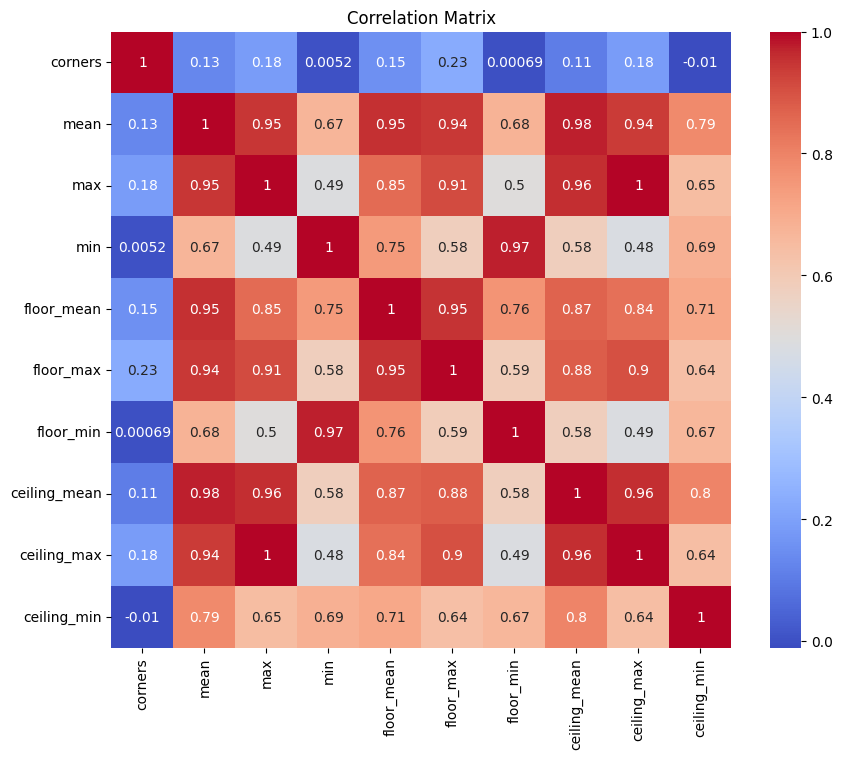

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Axes: >

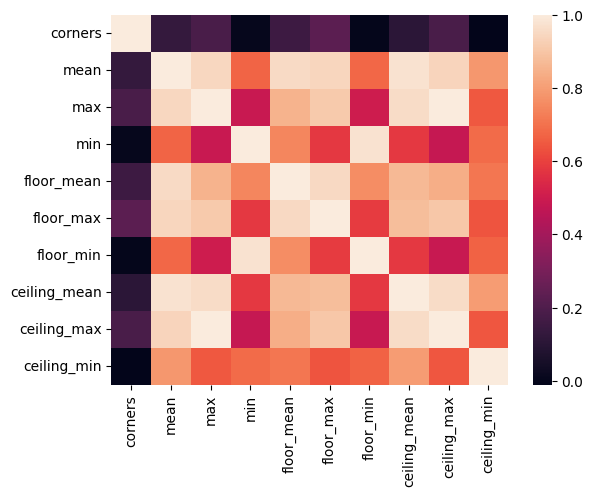

In [28]:
sns.heatmap(df.corr())

In [31]:
corMean = df.groupby('corners').mean()
corMedian = df.groupby('corners').median()


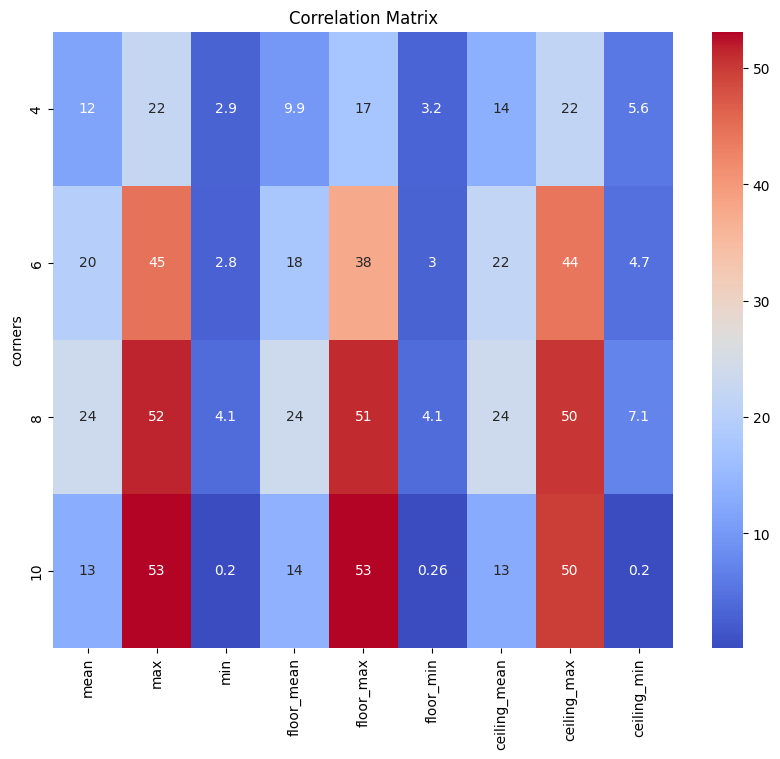

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(corMean, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

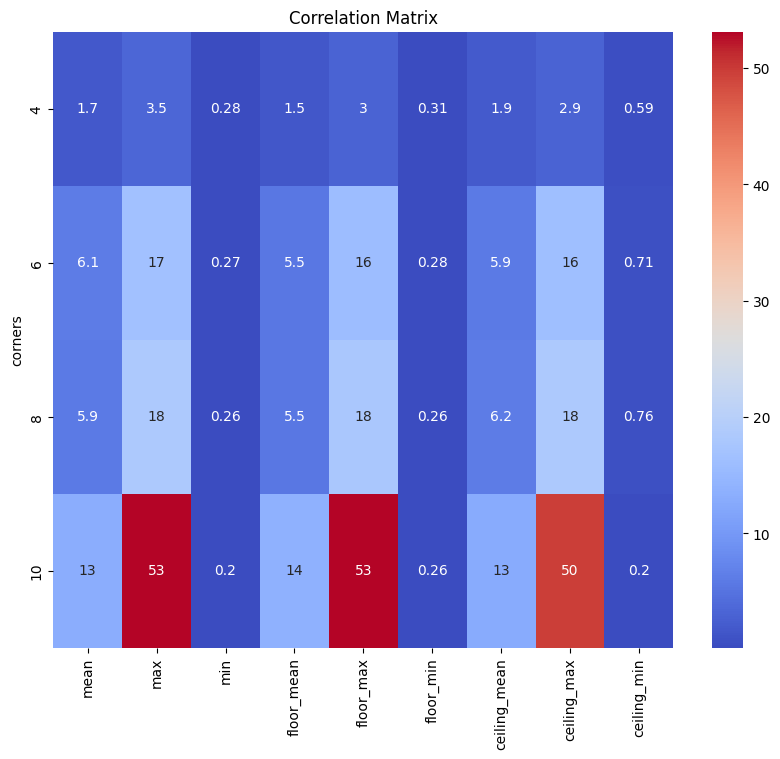

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(corMedian, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

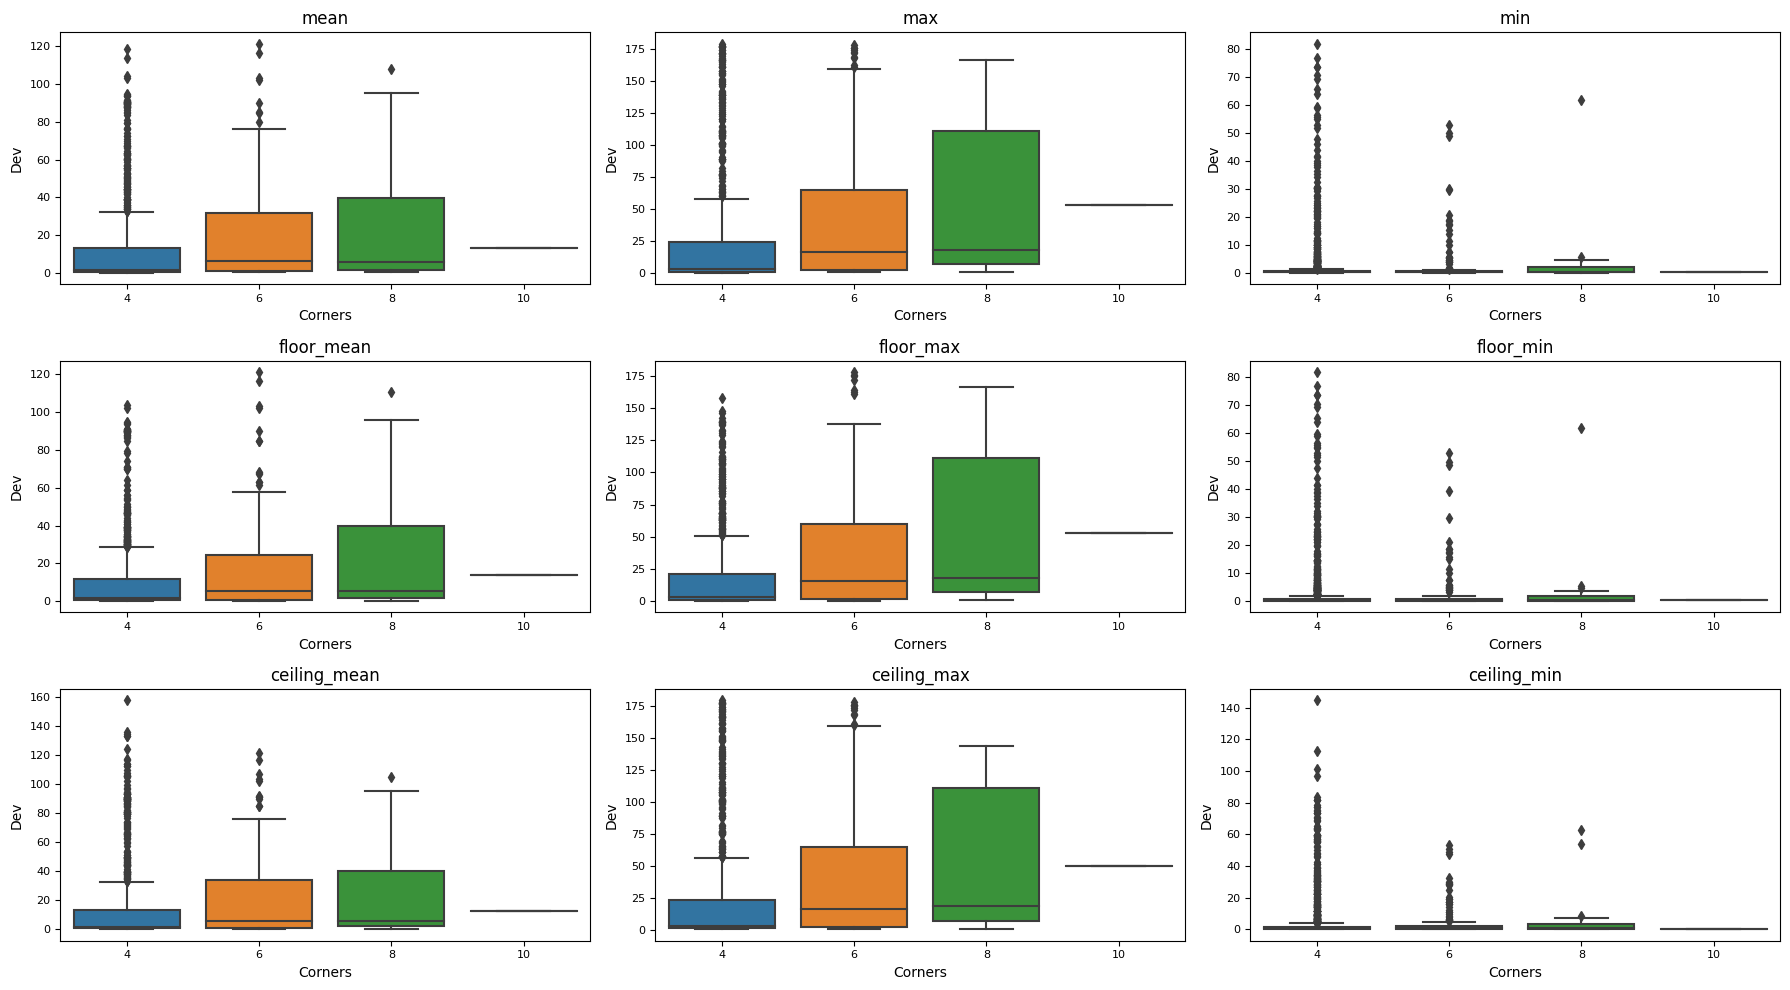

In [44]:
n = 1
plt.figure(figsize=(18, 10))
for col in df.columns[1:]:
    plt.subplot(3, 3, n)
    sns.boxplot(data=df, x='corners', y=col)
    plt.title(col, fontsize=12)
    plt.xlabel('Corners', fontsize=10)
    plt.ylabel('Dev', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    n += 1

plt.tight_layout()
plt.show()


In [45]:
df[df['corners'] == 10]


,corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
739,10,13.202775,53.145464,0.195567,13.67592,53.145464,0.262791,12.72963,49.7854,0.195567
